# CNNbasic Assignment#2

# AlexNet 구현

모델 구현 후 summary로 전체 모델 구조 출력과 주석으로 간단한 설명을 달아주시면 됩니다.

프레임워크는 자유이고, 기본 tensforflow와 pytorch tutorial 사이트를 아래에 첨부해 드립니다.

이 외 각 프레임워크 별 summary 등 추가적인 사용 방법은 구글링으로 찾아주세요!-!

- Tensorflow Tutorial: https://www.tensorflow.org/tutorials?hl=ko

- Pytorch Tutorial: https://tutorials.pytorch.kr/

![image-2.png](attachment:image-2.png)

## Tensorflow(keras)

In [11]:

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import tensorflow
n_classes = 1000 # class 개수

model=Sequential()

############## Add Layer ##############

#계층 1
#11 * 11 필터를 96개, strides=4, 활성화 함수 = relu
model.add(Conv2D(96,(11,11),strides=4,padding="same",input_shape=(227,227,3))) 
#입력 데이터 227 * 227, pooling layer 3 * 3
model.add(MaxPooling2D(pool_size=(3,3),strides=2)) 


#계층2
#5 * 5 필터를 256개, strides=1, 활성화 함수 = relu 
model.add(Conv2D(256,(5,5),activation="relu",strides=1,padding="same")) 
model.add(Lambda(tensorflow.nn.local_response_normalization))
#pooling layer 3 * 3
model.add(MaxPooling2D(pool_size=(3,3),strides=2)) 


#계층3
#3 * 3 필터를 384개, strides=1, 활성화함수 = relu
model.add(Conv2D(384,(3,3),activation="relu",strides=1,padding="same")) 
model.add(Lambda(tensorflow.nn.local_response_normalization))

#계층4
#3 * 3 필터를 384개, strides=1, 활성화함수 = relu
model.add(Conv2D(384,(3,3),activation="relu",strides=1,padding="same")) 

#계층5
#3 * 3 필터를 256개, strides=1, 활성화함수 = relu
model.add(Conv2D(256,(3,3),activation="relu",strides=1,padding="same")) 
#pooling layer 3 * 3
model.add(MaxPooling2D(pool_size=(3,3),strides=2)) 

#1차원 배열로 바꾸기
model.add(Flatten())

#계층6
#4096개 뉴런, 활성화함수 = relu
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0,5))

#계층7
#4096개 뉴런, 활성화함수 = relu
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0,5))

#계층8
#1000개 뉴런, 활성화함수 = softmax
model.add(Dense(1000,activation="softmax"))
#######################################

opt = tensorflow.keras.optimizers.SGD(lr=0.01, decay=5e-5, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# keras summary
model.summary() # summary code 추가

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 57, 57, 96)        34944     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 28, 28, 256)       614656    
_________________________________________________________________
lambda_9 (Lambda)            (None, 28, 28, 256)       0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
lambda_10 (Lambda)           (None, 13, 13, 384)      


## Pytorch
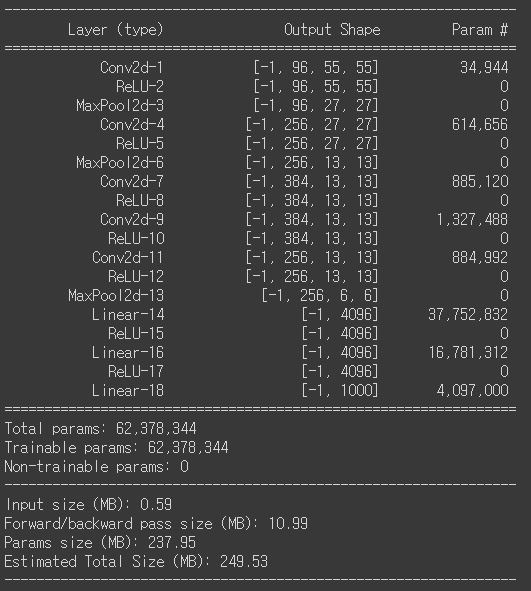

In [13]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


class AlexNet(nn.Module):

    def __init__(self, n_classes=1000):
        super(AlexNet, self).__init__()
        self.feature_extract = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75),

            nn.MaxPool2d(kernel_size=3,stride=2),

            nn.Conv2d(96, 256, kernel_size=5,stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75),

            nn.MaxPool2d(kernel_size=3,stride=2),

            nn.Conv2d(256, 384, kernel_size=3, stride=1,padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.flatten = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            
            ## [Layer 10] Fully Connected Layer
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            
            ## [Layer 11] Fully Connected Layer
            nn.Linear(4096, n_classes),
        )
         
        

    def forward(self, x):

      conv_layers=self.feature_extract(x)
      flatten=conv_layers.view(conv_layers.size(0),-1)
      result=self.flatten(flatten)
        
      return result


# pytorch summary
model=AlexNet()
summary(model,input_size=(3,227,227)) # summary code 추가

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
 LocalResponseNorm-3           [-1, 96, 55, 55]               0
         MaxPool2d-4           [-1, 96, 27, 27]               0
            Conv2d-5          [-1, 256, 27, 27]         614,656
              ReLU-6          [-1, 256, 27, 27]               0
 LocalResponseNorm-7          [-1, 256, 27, 27]               0
         MaxPool2d-8          [-1, 256, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]         885,120
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 384, 13, 13]       1,327,488
             ReLU-12          [-1, 384, 13, 13]               0
           Conv2d-13          [-1, 256, 13, 13]         884,992
             ReLU-14          [-1, 256,